In [13]:
import pandas as pd
import numpy as np

# Giả lập dữ liệu doanh thu 24 tháng (2 năm)
np.random.seed(42)
months = np.arange(1, 25)  # tháng 1 → 24
revenue = 100 + 10*np.sin(months/2) + np.random.normal(0, 5, 24) + months*2  # doanh thu tăng dần có nhiễu

data = pd.DataFrame({'Month': months, 'Revenue': revenue})
data.to_excel('sales_data.xlsx', index=False)

print("✅ Đã tạo file sales_data.xlsx")
data.head()


✅ Đã tạo file sales_data.xlsx


,Month,Revenue
0,1,109.277826
1,2,111.723388
2,3,119.213393
3,4,124.708124
4,5,114.813955


In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel('sales_data.xlsx')
print("Dữ liệu gốc:")
print(df.head())

# Chuẩn hóa dữ liệu để mô hình học tốt hơn
scaler = MinMaxScaler()
df['Revenue_scaled'] = scaler.fit_transform(df[['Revenue']])

# Tạo dữ liệu train/test
X = df['Month'].values.reshape(-1, 1)
y = df['Revenue_scaled'].values

# Chia tập train/test (20 tháng train, 4 tháng test)
X_train, X_test = X[:20], X[20:]
y_train, y_test = y[:20], y[20:]


Dữ liệu gốc:
   Month     Revenue
0      1  109.277826
1      2  111.723388
2      3  119.213393
3      4  124.708124
4      5  114.813955


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Mô hình ANN đơn giản: 1 input → 2 hidden → 1 output
model = Sequential([
    Dense(16, activation='relu', input_shape=(1,)),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=150, verbose=0)
print("Huấn luyện hoàn tất!")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177 (708.00 B)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

Huấn luyện hoàn tất!


In [16]:
# Dự đoán doanh thu
y_pred_scaled = model.predict(X)
y_pred = scaler.inverse_transform(y_pred_scaled)

# Gộp kết quả vào dataframe
df['Predicted_Revenue'] = y_pred
print(df.tail(5))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
    Month     Revenue  Revenue_scaled  Predicted_Revenue
19     20  127.498270        0.603682         134.700958
20     21  140.531286        0.967580         136.059479
21     22  132.871216        0.753701         137.417969
22     23  137.583119        0.885263         138.776474
23     24  135.510530        0.827394         140.134995


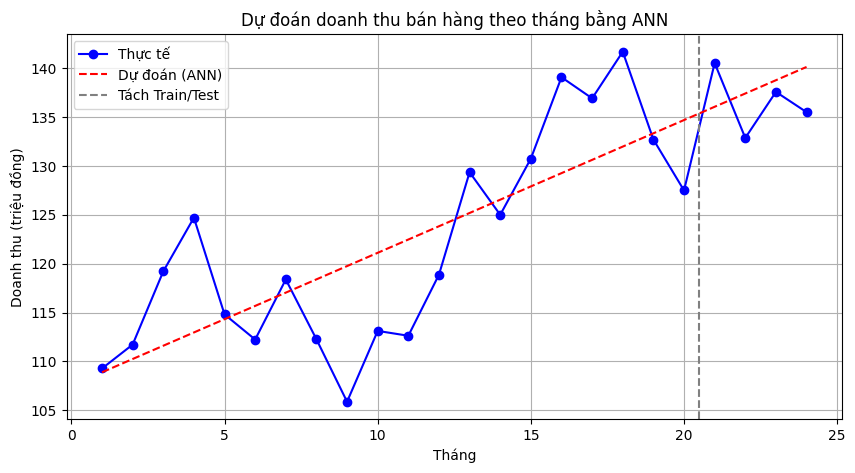

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df['Month'], df['Revenue'], 'bo-', label='Thực tế')
plt.plot(df['Month'], df['Predicted_Revenue'], 'r--', label='Dự đoán (ANN)')
plt.axvline(x=20.5, color='gray', linestyle='--', label='Tách Train/Test')
plt.title("Dự đoán doanh thu bán hàng theo tháng bằng ANN")
plt.xlabel("Tháng")
plt.ylabel("Doanh thu (triệu đồng)")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# Dự đoán 4 tháng kế tiếp
future_months = np.arange(25, 29).reshape(-1, 1)
future_pred_scaled = model.predict(future_months)
future_pred = scaler.inverse_transform(future_pred_scaled)

future_df = pd.DataFrame({'Month': future_months.flatten(), 'Predicted_Revenue': future_pred.flatten()})
print("Dự đoán doanh thu các tháng tiếp theo:")
print(future_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Dự đoán doanh thu các tháng tiếp theo:
   Month  Predicted_Revenue
0     25         141.493469
1     26         142.851959
2     27         144.210495
3     28         145.569000
